## <center> Multiple Linear Regression </center>





Now you know how to build a model with one X (feature variable) and Y (response variable). But what if you have three feature variables, or may be 10 or 100? Building a separate model for each of them, combining them, and then understanding them will be a very difficult and next to impossible task. By using multiple linear regression, you can build models between a response variable and many feature variables.



Let's see how to do that.



**Advantages/Features of Multiple Linear Regression**
1. The chances of getting a better-fit increase as the generated models are dependent on more than 1 feature
2. Multiple Linear Regression can detect outliers and anomalies very effectively. 

**Disadvantages/Shortcomings of Multiple Linear Regression**
1. The problem of overfitting is very prevalent here, as we can use all features to generate the model, so the model can start "memorizing" the values 
2. Accuracy decreases as the linearity of the dataset decreases.

**The multiple regression model is based on the following assumptions:**
1. Linearity: There is a linear relationship between the dependent variables and the independent variables.
2. Correlation: The independent variables are not too highly correlated with each other.
3. yi observations are selected independently and randomly from the population.
4. Normal Distribution: Residuals should be normally distributed with a mean of 0 and variance σ.

Here you will make your hands dirty with housing dataset which you can download from your canvas portal itself

**Here is the Problem Statement for you:**

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.


### Importing and Understanding Data




In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

In [26]:
from google.colab import files
uploaded = files.upload()
# Importing Housing.csv
import io
housing_df = pd.read_csv(io.BytesIO(uploaded['Housing.csv']))


In [ ]:
# Looking at the first five rows

housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# What type of values are stored in the columns?

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Data Preparation



- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- We need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.


In [27]:
# Converting Yes to 1 and No to 0 using map function

housing_df['mainroad'] =  housing_df['mainroad'].map({'yes': 1, 'no' :0})
housing_df['guestroom'] = housing_df['guestroom'].map({'yes': 1, 'no' :0})
housing_df['basement'] =  housing_df['basement'].map({'yes': 1, 'no' :0})
housing_df['hotwaterheating'] = housing_df['hotwaterheating'].map({'yes': 1, 'no' :0})
housing_df['airconditioning'] = housing_df['airconditioning'].map({'yes': 1, 'no' :0})
housing_df['prefarea'] =  housing_df['prefarea'].map({'yes': 1, 'no' :0})

In [28]:
# Now let's see the head
housing_df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


The variable 'furnishingstatus' had three levels. We need to convert it to integer.


In [ ]:
# Creating a dummy variable for 'furnishingstatus' or you can say we want to do one-hot encoding on it.
status = pd.get_dummies(housing_df['furnishingstatus'])

In [ ]:
# The result has created three variables that are not needed.
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [29]:
# we don't need 3 columns.
# we can use drop_first = True to drop the first column from status dataframe.
status = pd.get_dummies(housing_df['furnishingstatus'], drop_first = True)


In [ ]:
#print status
print(status.head())

   semi-furnished  unfurnished
0               0            0
1               0            0
2               1            0
3               0            0
4               0            0


In [30]:
#Adding the results to the master dataframe i.e housing
housing_df = pd.concat([housing_df, status], axis = 1)

In [31]:
# Dropping furnishingstatus from housing data as we have created the dummies for it
housing_df.drop('furnishingstatus', axis = 1, inplace= True)

In [32]:
# Now let's see the head of our dataframe.
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#### Creating a new variable

In [33]:
# Let us create the new metric and assign it to "areaperbedroom". As name suggested you need to calculate area per bedroom
housing_df['areaperbedroom'] = housing_df['area'] / housing_df['bedrooms']

In [34]:
# Create another new Metric:bathrooms per bedroom
housing_df['bbratio'] = housing_df['bathrooms'] / housing_df['bedrooms']

In [35]:
# print housing head
housing_df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


### Rescaling the Features 


It is extremely important to rescale the variables so that they have a comparable scale. 
There are two common ways of rescaling which you might be knowing by solving your previous assignments.

1. Normalisation (min-max scaling) and 
2. standardisation (mean-o, sigma-1) 


In [36]:
#defining a normalisation function 
#hint use formula=(x-min(x))/(max(x) - min(x))
def normalize (x): 
  return ((x - np.min(x)) / (max(x) - min(x)))
    
                                            
                                              
# applying normalize ( ) to all columns using apply function 
housing_df = housing_df.apply(normalize)

## Splitting Data into Training and Testing Sets



In [37]:
# print all housing columns available to decide which all variables will be our feature and target variable
housing_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [38]:
# Putting feature variable to X

X = housing_df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]

# Putting response variable to y ie. price

y = housing_df['price']

lets split dataset using test train split module and set a random state as 100. 

Random_state is the seed used by the random number generator, it can be any integer by the way not neccessarily 100


In [39]:
# import test_train_split module
from sklearn.model_selection import train_test_split

# test and train split with train_size as 30% and random state as 100
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

The splitting of test and train procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

Now you must be thinking why we even do that.<br>
The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

This is how we expect to use the model in practice. Namely, to fit it on available data with known inputs and outputs, then make predictions on new examples in the future where we do not have the expected output or target values.

The train-test procedure is appropriate when there is a sufficiently large dataset available.


## Building a linear model



In [40]:
# Importing statsmodels module as sm
import statsmodels.api as sm
# Adding a constant column to our X_train dataframe
X_train = sm.add_constant(X_train)
# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()

In [41]:
#Let's see the summary of our first linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           4.56e-82
Time:                        06:20:59   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0603      0.059     

## Checking multicollinearity



Multicollinearity generally occurs when there are high correlations between two or more predictor variables. In other words, one predictor variable can be used to predict the other. This creates redundant information, skewing the results in a regression model

Ok now don't be confused with term collinearity.

Collinearity is a linear association between two predictors. Multicollinearity is a situation where two or more predictors are highly linearly related
severe multicollinearity is a problem because it can increase the variance of the coefficient estimates and make the estimates very sensitive to minor changes in the model. The result is that the coefficient estimates are unstable and difficult to interpret.

So its important to remove multicollinearity from our dataset


In [42]:
# Importing matplotlib and seaborn 
import matplotlib.pyplot as plt
import seaborn as sns

# write magic function matplotlib inline
%matplotlib inline

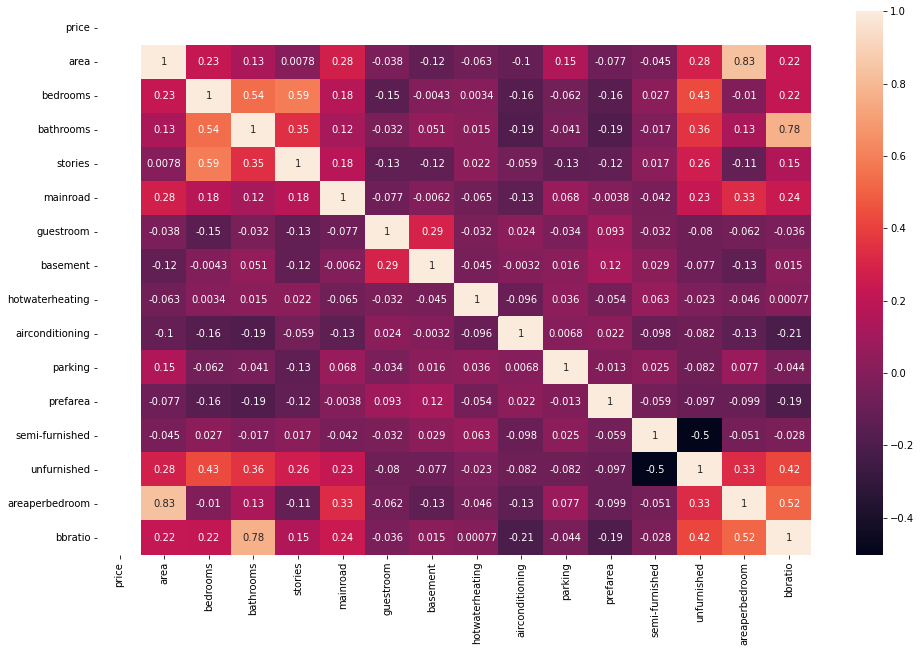

In [43]:
# Let's see the correlation matrix on hoousing data
# Size of the figure=(16,10)
corr = housing.corr()
plt.figure(figsize= (16,10))
sns.heatmap(corr, annot= True)
plt.show()


### Checking VIF

Multicollinearity can be detected via various methods. In this assignemnt, we will focus on the most common one – VIF (Variable Inflation Factors).<br>
VIF score of an independent variable represents how well the variable is explained by other independent variables.
1. VIF starts at 1 and has no upper limit
2. VIF = 1, no correlation between the independent variable and the other variables
3. VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. VIF is preferred as it can show the correlation of a variable with a group of other variables.

Lets define a function vif_scores that takes a dataframe with relevant input features and returns a dataframe with two columns
1. variables which  has feature name
2. VIF which has vif score for corresponding feature

Please do have patience to run this function again and again as you will be required to drop all the variables one by one with high vif (>5).

So lets impliment it.


In [44]:
# import variance_inflation_factor module
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Define vif_scores function as stated above

def vif_scores(input_df):
  # creating one empty dataframe
  vif_data = pd.DataFrame()
  # initializing df columns into empty dataframe as variables
  vif_data["variables"] = input_df.columns
  # calculating VIF for each variables
  vif_data["VIF"] = [variance_inflation_factor(input_df.values, i) for i in range(len(input_df.columns))]
  # returning the o/p 
  return vif_data.sort_values(by = 'VIF', ascending= False)

# print vif scores for all current input features
vif_scores(X)

,variables,VIF
13,areaperbedroom,68.707105
0,area,57.516048
14,bbratio,29.249998
2,bathrooms,11.106354
1,bedrooms,10.683404
4,mainroad,7.910522
3,stories,2.805901
11,semi-furnished,2.614252
12,unfurnished,2.382862
6,basement,2.045854


In [ ]:
# import variance_inflation_factor module
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Define vif_scores function as stated above
vif_data = pd.DataFrame()

vif_data["variables"] = X.columns
# calculating VIF for each variables
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

# print vif scores for all current input features
print(vif_data)

,variables,VIF
13,areaperbedroom,68.707105
0,area,57.516048
14,bbratio,29.249998
2,bathrooms,11.106354
1,bedrooms,10.683404
4,mainroad,7.910522
3,stories,2.805901
11,semi-furnished,2.614252
12,unfurnished,2.382862
6,basement,2.045854


### Dropping the Variable and Updating the Model

Dropping highly correlated variables and insignificant variables through both correlation matrix and vif scores.

As you can see there are two groups of multicollinear variables. 
1. areaperbedroom and area
2. bbratio and bathrooms

the first group is neccesary for us to keep as it gives us relevant impact on traget, but from second set as we know that bbratio is not as significant as bathrooms, so we will drop it off.


In [45]:
# Lets check vif scores again after removing bbratio from features.
vif_scores(X.drop('bbratio', axis = 1))

,variables,VIF
0,area,20.716025
13,areaperbedroom,18.437262
1,bedrooms,10.026456
4,mainroad,7.459237
3,stories,2.783201
11,semi-furnished,2.484125
12,unfurnished,2.204838
6,basement,2.027730
9,parking,2.004052
8,airconditioning,1.768236


As you can see the vif scores are still high. Lets drop bedroom also as input feature and again check vif scores.


In [46]:
# Lets check vif scores after removing bedrooms from left features.
vif_scores(X.drop(['bedrooms','bbratio'], axis = 1))

,variables,VIF
0,area,14.978857
12,areaperbedroom,13.881473
3,mainroad,6.099134
2,stories,2.559555
10,semi-furnished,2.037729
8,parking,1.999982
5,basement,1.901473
7,airconditioning,1.762488
11,unfurnished,1.722278
1,bathrooms,1.692180


As you can see the vif scores are still high. Lets drop areaperbedroom which we calculated as input feature and again check vif scores.

Its very natural that both area, bedroom and areaperbedroom will be highly correlated with each other as areaperbedroom is calculated out of area and bedroom.



In [47]:
# Lets check vif scores after removing areaperbedroom from features which are left.

vif_scores(X.drop(['bedrooms','areaperbedroom','bbratio'], axis = 1))

,variables,VIF
3,mainroad,5.513523
0,area,4.427217
2,stories,2.323144
10,semi-furnished,2.004738
8,parking,1.987943
5,basement,1.896942
7,airconditioning,1.760737
11,unfurnished,1.652372
1,bathrooms,1.619363
9,prefarea,1.497335


Now as you can still se vif scores are again more than 5. But if you see only 'mainroad' feature which having high vif score does'nt mean that you will remove it.
You need to see the importance of that particular feature also in price prediction. Since mainoad, area and stories are really important to us. So you can go with removing semi-furnished feature next.

In [48]:
# Lets check vif scores after removing semi-furnished from features which are left.

vif_scores(X.drop(['bedrooms','areaperbedroom','bbratio','semi-furnished'], axis = 1))

,variables,VIF
3,mainroad,4.845386
0,area,4.362200
2,stories,2.301304
8,parking,1.987700
5,basement,1.860222
7,airconditioning,1.753933
1,bathrooms,1.619286
9,prefarea,1.490106
4,guestroom,1.470984
10,unfurnished,1.341568


hey hey! still vif scores of some features are close to 5. Lets check which one we can drop off. If you see first five features are of importance but then least important among them would be basement.


In [49]:
# Lets check vif scores after removing basement from features which are left.

vif_scores(X.drop(['bedrooms','areaperbedroom','bbratio','semi-furnished', 'basement'], axis = 1))

,variables,VIF
3,mainroad,4.583261
0,area,4.362124
2,stories,2.206626
7,parking,1.986493
6,airconditioning,1.749777
1,bathrooms,1.589915
8,prefarea,1.442071
9,unfurnished,1.340895
4,guestroom,1.291867
5,hotwaterheating,1.079947


Well done. Now we have vif scores less than 5 

So in total  we have removed 5 features namely "bedrooms","bbratio","areaperbedroom","semi-furnished" and "basement".

Now, we have our final list of input features. Lets drop these 5 features from X_train as well and rebuild ypur model.

## Making Predictions by rebuilding Model



Lets do another test train split after dropping highly correlated variables and insignificant variables from X.


In [50]:
housing_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [52]:
# Putting feature variable to X
X = housing_df[['area','bathrooms','stories', 'mainroad',
       'guestroom','hotwaterheating', 'airconditioning',
       'parking', 'prefarea','unfurnished']]

# Putting response variable to y ie. price
y = housing_df['price']

In [53]:
# test train split again on X and y
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .3, random_state= 100)

Building our linear model again

In [54]:
# Adding a constant column to our dataframe
X_train =  sm.add_constant(X_train)


# Adding  constant variable to test dataframe
X_test = sm.add_constant(X_test)

# create a second fitted model
lm_2 = sm.OLS(y_train,X_train).fit()

In [55]:
#print model 2 summary
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           3.13e-84
Time:                        06:51:49   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0390      0.015     

In [56]:
# Making predictions
y_pred = lm_2.predict(X_test)

## Model Evaluation

 


The skill or performance of a regression model must be reported as an error in those predictions.
You don’t want to know if the model predicted the value exactly (this might be intractably difficult in practice); instead, we want to know how close the predictions were to the expected values.

Error addresses exactly this and summarizes on average how close predictions were to their expected values.



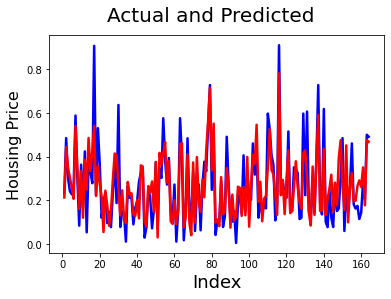

In [57]:
# Actual vs Predicted graph as below
c = [i for i in range(1,165,1)]
fig = plt.figure()
#Plotting Actual
plt.plot(c,y_test, color = 'blue', linewidth = 2.5, linestyle = "-")
#Plotting predicted
plt.plot(c, y_pred, color = 'red', linewidth = 2.5, linestyle = "-")
# Plot heading 
fig.suptitle('Actual and Predicted', fontsize = 20)
# X-label
plt.xlabel('Index', fontsize = 18)
# Y-label
plt.ylabel('Housing Price', fontsize = 16)
#showing the plot
plt.show()

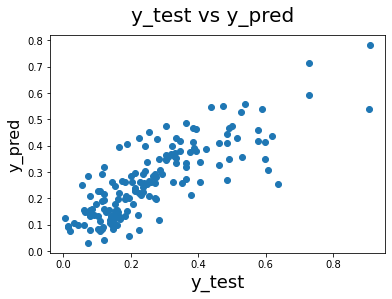

In [58]:
# Plotting y_test and y_pred scatter plot to understand the spread.
fig = plt.figure()
#plotting scatter plot between actual and predicted
plt.scatter(y_test, y_pred)
# Plot heading 
fig.suptitle('y_test vs y_pred', fontsize = 20)
# X-label
plt.xlabel('y_test', fontsize = 18)
# Y-label
plt.ylabel('y_pred', fontsize = 16)
#show plot
plt.show()

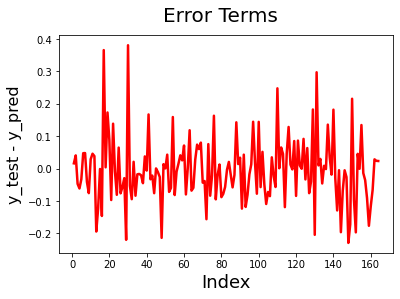

In [59]:
# Plotting line chart of Error terms
fig = plt.figure()
c = [i for i in range(1,165,1)]
# line plot between c and error trem
plt.plot(c, y_test - y_pred, color = 'red', linewidth = 2.5, linestyle = "-")
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)
# X-label
plt.xlabel('Index', fontsize= 18)
# Y-label
plt.ylabel('y_test - y_pred', fontsize = 16)
#show plot
plt.show()

In [60]:
import warnings
warnings.filterwarnings('ignore')

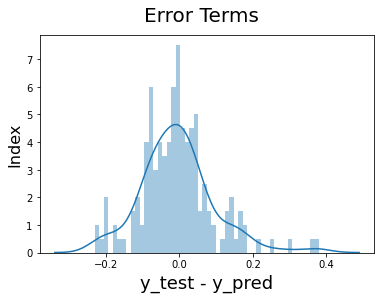

In [61]:
# Plotting the error terms as dist plot to understand the distribution.
fig = plt.figure()
#plot distplot of error term
sns.distplot((y_test - y_pred), bins = 50)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)
# X-label
plt.xlabel('y_test - y_pred', fontsize = 18)
# Y-label
plt.ylabel('Index', fontsize = 16)
#show plot
plt.show()

**Regression Metrics**


There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

1. Mean Squared Error (MSE).
2. Root Mean Squared Error (RMSE).
3. Mean Absolute Error (MAE)

There are many other metrics for regression, although these are the most commonly used. You can see the full list of regression metrics supported by the scikit-learn Python machine learning library here:

https://scikit-learn.org/stable/modules/classes.html#regression-metrics


In [62]:
#import metrics module
from sklearn import metrics

#calculate and print RMSE
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.10001092336807833


In [63]:
#calculate and print MSE

print('MSE :', metrics.mean_squared_error(y_test, y_pred))


MSE : 0.010002184792935636


In [64]:
#calculate and print MAE

print("MAE :", metrics.mean_absolute_error(y_test, y_pred))

MAE : 0.07292774941484104


## Feature Selection



Once you have obtained your initial error metric/s, take note of which X’s have minimal impacts on y. Removing some of these features may result in an increased accuracy of your model.

So, We begin a process of trial and error, where the process is started over again, until a satisfactory model is produced.

To do this we already have a ready made library called RFE. 
So lets do feature selection using RFE using LinearRegression module.


In [65]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [66]:
# Initializing linearRegression function 
lm = LinearRegression()

# Iitialising RFE using above model
rfe = RFE(lm)

# Fitting and running RFE with X_train and y_train
rfe = rfe.fit(X_train, y_train)

# Printing the boolean results for each features
print(rfe.support_) 

# Printing the ranks for each features
print(rfe.ranking_)  

[False  True  True  True False False  True  True False False False]
[7 1 1 1 4 5 1 1 3 2 6]


In [67]:
#Print the total no. of features in X
print(len(X.columns))
#Get columns which are supported by RFE
col= X_train.columns[rfe.support_]

# print col
print(col)


10
Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning'], dtype='object')


As you can see that 5 features got selected out of initial 11 features.

## Visualising Data



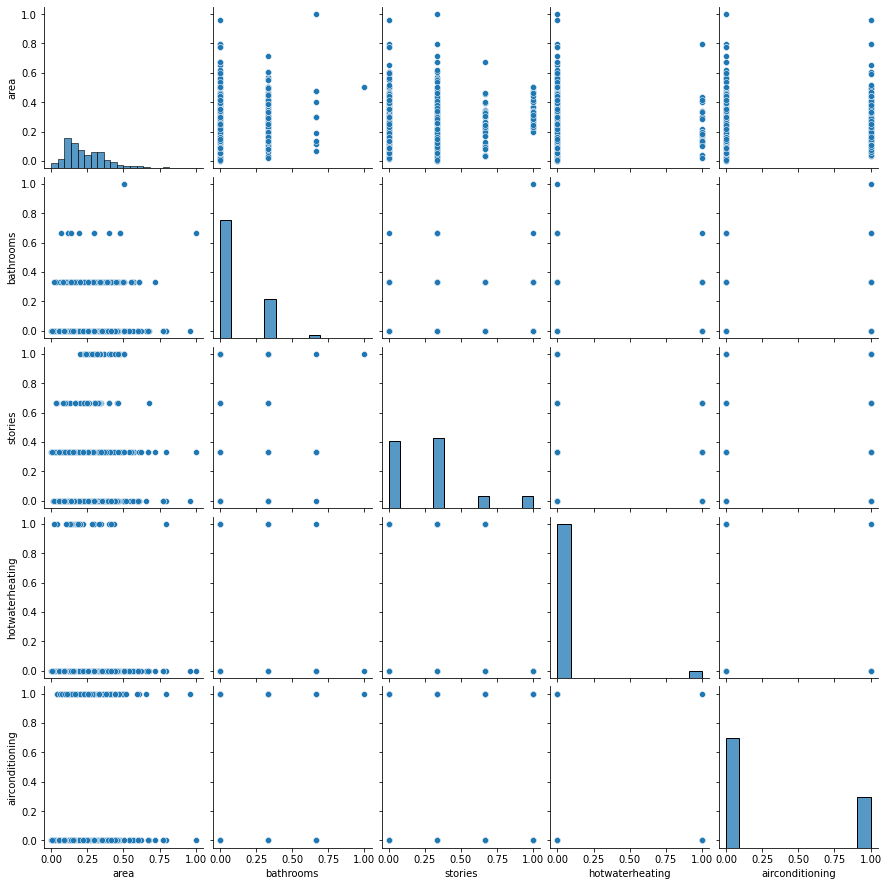

In [69]:
# Let's plot a pair plot of all RFE selected variables in housing dataframe
sns.pairplot(housing_df[col])

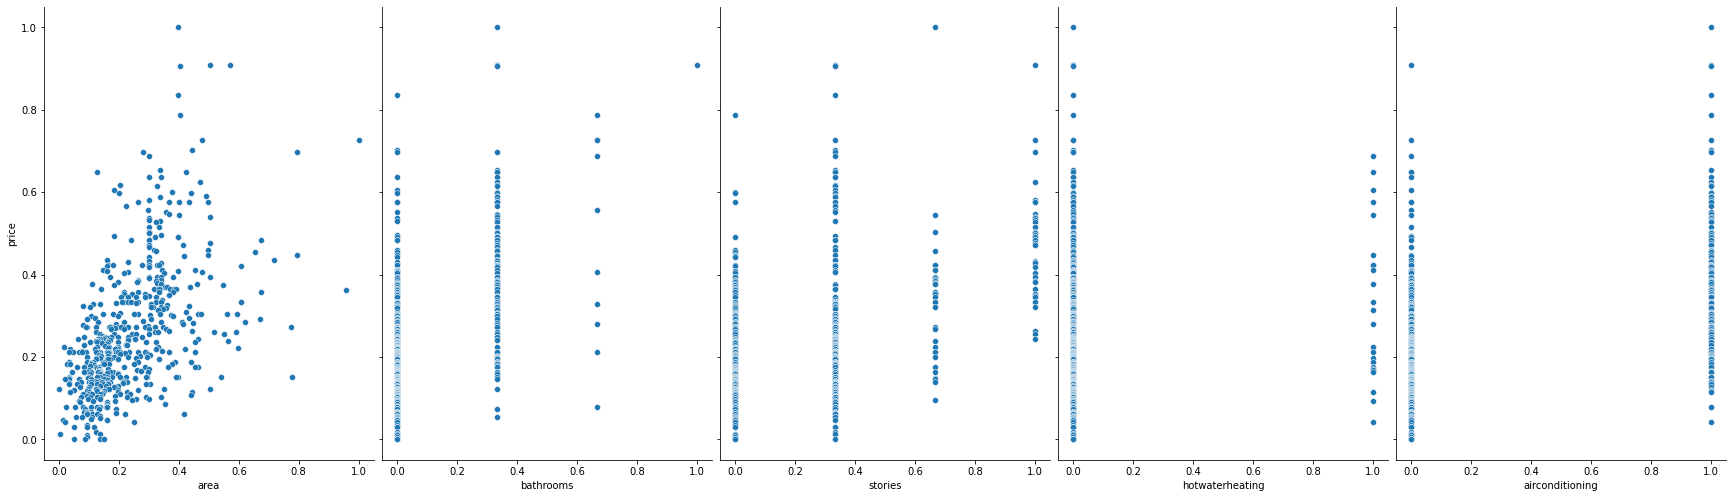

In [70]:
# # Visualise the relationship between the features and the response using scatterplots (use size=7 and aspect=0.7 )

sns.pairplot(housing_df, x_vars= col, y_vars= 'price', size = 7, aspect=0.7, kind = 'scatter')

So above you can see that the relationship between target and features shows some constant relation.
Lets try our luck if this model performs better than the last model.


## Building model again with above selected features.



So this would be our third model

In [71]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [72]:
# Adding a constant variable in X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)

In [73]:
# fitting your third linear model with y_train and X_train_rfe
lm_3 = sm.OLS(y_train, X_train_rfe).fit()

In [74]:
#print model 3 summary
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     110.4
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           1.79e-71
Time:                        07:51:58   Log-Likelihood:                 336.26
No. Observations:                 381   AIC:                            -660.5
Df Residuals:                     375   BIC:                            -636.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0625      0.011     

In [75]:
# Calculating Vif scores on housing data with selected columns by RFE
vif_scores(housing_df[col])

,variables,VIF
2,stories,1.981353
0,area,1.955661
4,airconditioning,1.708072
1,bathrooms,1.546809
3,hotwaterheating,1.062917


Wohoo! all these features looks good .

Now let's use our model to make predictions.


In [76]:
# Creating X_test dataframe with RFE selected variables
X_test_rfe = X_test[col]

# Adding a constant variable to X_test_rfe
X_test_rfe = sm.add_constant(X_test_rfe)

# Making predictions
y_pred = lm_3.predict(X_test_rfe)

Now again lets evaluate oour third model.



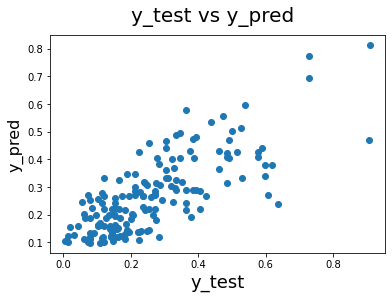

In [77]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()



In [78]:
# Print RMSE, MSE and MAE scores for your third model

print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MSE :',metrics.mean_squared_error(y_test, y_pred))
print('MAE :',metrics.mean_absolute_error(y_test, y_pred))



RMSE : 0.11109769272262061
MSE : 0.012342697328289829
MAE : 0.08466527728226741


## Model Selection



Seeing the results we can see that there is not much change in  model performance compared to your second model.
Infact rmse score got increased. The reason could be that we might have removed some features which were of importance.

May be your linear model wants some other features also to explain your target variable. 

We want you to underatand summary of all three models together

In [79]:
#print summary of all 3 built models

print(lm_1.summary())
print(lm_2.summary())
print(lm_3.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           4.56e-82
Time:                        08:00:17   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0603      0.059     

We understand that these summary shows a lot of data to understand. 

1. **Coef**: Regression coefficients represent the mean change in the response variable for one unit of change in the predictor variable while holding other predictors in the model constant. This statistical control that regression provides is important because it isolates the role of one variable from all of the others in the model.

So its obvious that more the coefficient more important is the feature.


2.**R-squared**: It signifies the “percentage variation in dependent that is explained by independent variables”. Here, 59.2% variation in y is explained by X1, X2, X3, X4 and X5. This statistic has a drawback, it increases with the number of predictors(dependent variables) increase. Therefore, it becomes inconclusive in case when it is to be decided whether additional variable is adding to the predictability power of the regression.




3. **Adj. R-squared**: This is the modified version of R-squared which is adjusted for the number of variables in the regression. It increases only when an additional variable adds to the explanatory power to the regression.

We gave you three metric explaination. Now just try to compare these things in all three models.
You will see that second model is perfoming better in terms of coefficient, R2 and adjusted r2. Also if you see metrics you calculated for model 2 and model 3, the second model is better there also.


So we can finalise that our second model is the best model to solve our problem statement ie.to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.


## Let's understand the summary of OLS Regression

It helps us to understand wheather our Linear Regression Model is a good fit model or not.



*R- square* & *Adjusted R-square* value --
If your linear regression model is fit really well, then you will have R-square value closer to 1. If you go on adding features for a better prediction accuracy, then there are chances that your R-Square will remain at a heigher value closer to 1.

*Adjusted R-square* accounts for this by penalizing *R-Square* value that includes non-useful predictors.If you go on adding features which are of very little relevent to your overall model, *Adjusted R-Square* value will go lower.

If *Adjusted R-square* value is much less than *R-Square* value, it is a sign that a feature might not be relevant to your model, you need to find and delete that feature from your model.

If *R-Square* value and *Adjusted R-Square* value are close enough, it means model is perfectly fit.

*F-Statistics*

F-statistics or F-test is used for assessing the significance of the overall regression model.
In multilple regression, it compares the model with no predictor(i.e feature columns/ X_train)

The **Null Hypothesis** in the xase of F-statistics is that these two models are equal.
**Alternate Hypothesis** is that intercept only model is worse than our model

We get *p-value* as well as statistical value that will help to choose wheather to reject or accept the *Null Hypothesis**.

Given p-value(Prob(F-statistics)) clost to ZERO & F-Statistics value really large, we can reject the **Null Hypothesis**

F-statistics greater than 1 or a really large value with a p-value(probability of F-statistics) less than 0.5, signifies that there is a good amount of Linear Relationship between Target Variable and Feature Variable.

*t-test*

In order to inferm if a given feature a significance/relevant to the target variable,t-test is performed.

t-test behave slightly different from the F-test,

It looks at a relationship between the target variable and every predictor variable independently, without taking into account all the features at once.
It goes one feature at a time.

**Null Hypothesis** of a particular feature is that the feature1 value is going to equal to zero.

**Alternate Hypothesis** is that the feature co-efficient value will not be equal to zero.

We have t-values and a given p-value associated with the t-test.

Heigher the t-value, the greater the chances of rejecting the **Null Hypothesis**
Lower  value of p, signifies rejecting of **Null Hypothesis**.

NOTE --
if t-value is very small and p-value is very high, we fail to reject the _Null Hypothesis_, i.e co-efficient of feature is having a value 0.

It means that, this perticular feature is irrelevant to our model, and we can drop it.